In [ ]:
!gdown -O sc1_Phase1_GE_FeatureMatrix.tsv 1buHUNHKd6zd3RPBOqoo640IvcCGg8vvW
!gdown -O sc1_Phase1_GE_Phenotype.tsv 1XwMe38_jYx70NoZj59S8U1xX8KVHdgdn
!gdown -O sc1_Phase1_GE_Outcome.tsv 1Z7yDZvOnvI0SjoLFSl_Y9-USVss7q7XF

In [ ]:
!pip install pycaret

In [ ]:
!pip install pycaret[full]

In [ ]:
!pip install gdown

In [2]:
# check installed version
import pycaret
pycaret.__version__

'3.3.0'

In [4]:
import pandas as pd

ge_matrix = pd.read_table('data/sc1_Phase1_GE_FeatureMatrix.tsv')
phenotype = pd.read_table('data/sc1_Phase1_GE_Phenotype.tsv')
outcome = pd.read_table('data/sc1_Phase1_GE_Outcome.tsv')

In [8]:
data = pd.concat([ge_matrix, phenotype, outcome], axis=1)

In [9]:
data = data.drop(['PATIENTID'], axis=1)
data

,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,AA06,AAAS,...,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,SEX,RACE,WHO_GRADING,CANCER_TYPE,SURVIVAL_STATUS
0,6.557793,6.453623,5.302909,12.530607,6.082401,5.667769,6.764585,6.094459,6.240895,8.534378,...,5.847143,9.426022,10.027414,8.438376,8.853557,,NaN,II,ASTROCYTOMA,1
1,6.323015,6.305724,5.552097,13.000489,6.263721,5.347906,6.723860,6.143284,6.256355,8.935278,...,5.988549,9.988564,11.577409,8.672737,9.205295,,NaN,NaN,GBM,1
2,6.669421,6.414214,5.478774,12.545510,5.940785,5.639510,6.752736,6.001829,6.148274,8.703898,...,6.190679,9.531540,11.180062,8.484453,8.856021,,NaN,III,ASTROCYTOMA,1
3,6.502573,6.508156,5.648495,12.407083,6.414991,5.493800,6.912802,6.072980,6.318908,8.881858,...,6.422759,9.057685,10.062035,8.508903,7.742661,,NaN,NaN,UNCLASSIFIED,1
4,6.624505,6.911232,5.614099,10.777103,6.236386,5.512900,7.178968,6.088447,6.091908,8.197092,...,6.090243,10.298209,9.443150,8.204315,8.606522,,NaN,NaN,GBM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,6.344885,7.004975,5.804589,11.338722,6.929918,5.686911,7.256925,6.058814,6.414383,8.773312,...,6.530658,8.815291,9.185908,8.470488,8.670005,FEMALE,WHITE,III,ASTROCYTOMA,0
373,6.879257,6.475546,5.404566,13.971154,6.361109,5.350987,6.612382,6.056349,6.252476,8.680696,...,6.132492,9.081442,10.272506,8.322548,9.013977,MALE,WHITE,IV,GBM,1
374,7.070734,6.458277,5.490874,13.392288,6.268895,5.350325,6.846159,5.956444,6.225297,8.466163,...,6.114066,9.096826,11.026130,8.106846,8.516612,MALE,WHITE,IV,GBM,1
375,7.392832,6.965250,5.424097,12.614858,5.991026,5.441065,7.031373,6.044351,5.988191,8.779854,...,6.297594,9.346430,11.267400,8.512175,8.952521,FEMALE,WHITE,IV,GBM,1


In [10]:
data = data.dropna()
data

,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,AA06,AAAS,...,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,SEX,RACE,WHO_GRADING,CANCER_TYPE,SURVIVAL_STATUS
36,6.773502,6.789219,5.600558,9.098100,6.173517,5.440019,7.269116,6.331675,6.641092,9.134946,...,6.282242,8.895918,9.727756,8.539866,7.788628,FEMALE,WHITE,III,OLIGODENDROGLIOMA,1
37,6.888966,6.919759,5.382967,12.801268,6.267367,5.526409,7.406114,6.055349,6.228142,8.493976,...,6.013034,9.367449,9.538811,8.286802,8.667675,MALE,WHITE,IV,GBM,0
41,6.162679,6.690407,5.488302,13.112363,6.172498,5.311279,7.286909,6.268861,6.310759,8.605680,...,6.189606,8.856313,9.431750,8.242901,7.979640,FEMALE,WHITE,IV,GBM,1
43,6.791863,6.872367,5.427558,12.467948,5.984008,5.637168,7.221617,6.041661,6.152246,8.791074,...,6.385392,9.354172,9.746052,8.382402,8.677187,FEMALE,WHITE,IV,GBM,0
47,7.311807,7.044221,5.411064,13.161513,6.150529,5.508135,7.623547,6.050093,6.328601,8.594638,...,5.967357,9.289735,10.121427,8.246705,8.874775,FEMALE,WHITE,II,ASTROCYTOMA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,6.127782,6.404686,5.343114,11.859063,5.932489,5.315679,6.677011,6.051749,6.139659,8.313809,...,6.076498,9.856916,9.917498,8.297571,9.226458,FEMALE,WHITE,III,ASTROCYTOMA,1
372,6.344885,7.004975,5.804589,11.338722,6.929918,5.686911,7.256925,6.058814,6.414383,8.773312,...,6.530658,8.815291,9.185908,8.470488,8.670005,FEMALE,WHITE,III,ASTROCYTOMA,0
373,6.879257,6.475546,5.404566,13.971154,6.361109,5.350987,6.612382,6.056349,6.252476,8.680696,...,6.132492,9.081442,10.272506,8.322548,9.013977,MALE,WHITE,IV,GBM,1
374,7.070734,6.458277,5.490874,13.392288,6.268895,5.350325,6.846159,5.956444,6.225297,8.466163,...,6.114066,9.096826,11.026130,8.106846,8.516612,MALE,WHITE,IV,GBM,1


In [11]:
from sklearn.preprocessing import OrdinalEncoder

columns = ['SEX', 'RACE', 'WHO_GRADING', 'CANCER_TYPE']

ordinal_encoder = OrdinalEncoder()

data[columns] = ordinal_encoder.fit_transform(data[columns])
data

,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,AA06,AAAS,...,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,SEX,RACE,WHO_GRADING,CANCER_TYPE,SURVIVAL_STATUS
36,6.773502,6.789219,5.600558,9.098100,6.173517,5.440019,7.269116,6.331675,6.641092,9.134946,...,6.282242,8.895918,9.727756,8.539866,7.788628,0.0,5.0,1.0,3.0,1
37,6.888966,6.919759,5.382967,12.801268,6.267367,5.526409,7.406114,6.055349,6.228142,8.493976,...,6.013034,9.367449,9.538811,8.286802,8.667675,1.0,5.0,2.0,1.0,0
41,6.162679,6.690407,5.488302,13.112363,6.172498,5.311279,7.286909,6.268861,6.310759,8.605680,...,6.189606,8.856313,9.431750,8.242901,7.979640,0.0,5.0,2.0,1.0,1
43,6.791863,6.872367,5.427558,12.467948,5.984008,5.637168,7.221617,6.041661,6.152246,8.791074,...,6.385392,9.354172,9.746052,8.382402,8.677187,0.0,5.0,2.0,1.0,0
47,7.311807,7.044221,5.411064,13.161513,6.150529,5.508135,7.623547,6.050093,6.328601,8.594638,...,5.967357,9.289735,10.121427,8.246705,8.874775,0.0,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,6.127782,6.404686,5.343114,11.859063,5.932489,5.315679,6.677011,6.051749,6.139659,8.313809,...,6.076498,9.856916,9.917498,8.297571,9.226458,0.0,5.0,1.0,0.0,1
372,6.344885,7.004975,5.804589,11.338722,6.929918,5.686911,7.256925,6.058814,6.414383,8.773312,...,6.530658,8.815291,9.185908,8.470488,8.670005,0.0,5.0,1.0,0.0,0
373,6.879257,6.475546,5.404566,13.971154,6.361109,5.350987,6.612382,6.056349,6.252476,8.680696,...,6.132492,9.081442,10.272506,8.322548,9.013977,1.0,5.0,2.0,1.0,1
374,7.070734,6.458277,5.490874,13.392288,6.268895,5.350325,6.846159,5.956444,6.225297,8.466163,...,6.114066,9.096826,11.026130,8.106846,8.516612,1.0,5.0,2.0,1.0,1


In [12]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'SURVIVAL_STATUS', session_id = 123)

,Description,Value
0,Session id,123
1,Target,SURVIVAL_STATUS
2,Target type,Binary
3,Original data shape,"(166, 19340)"
4,Transformed data shape,"(166, 19340)"
5,Transformed train set shape,"(116, 19340)"
6,Transformed test set shape,"(50, 19340)"
7,Numeric features,19339
8,Preprocess,True
9,Imputation type,simple


In [13]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8727,0.7522,0.9800,0.8836,0.9284,0.2671,0.2819,1.7640
et,Extra Trees Classifier,0.8712,0.6894,1.0000,0.8697,0.9298,0.1250,0.1348,0.9710
rf,Random Forest Classifier,0.8629,0.6639,1.0000,0.8621,0.9255,0.0625,0.0674,0.9570
knn,K Neighbors Classifier,0.8553,0.5125,0.9900,0.8612,0.9207,0.0496,0.0536,1.0480
dummy,Dummy Classifier,0.8545,0.5000,1.0000,0.8545,0.9212,0.0000,0.0000,0.7640
ridge,Ridge Classifier,0.8470,0.0000,0.9500,0.8803,0.9127,0.2221,0.2310,0.8450
lightgbm,Light Gradient Boosting Machine,0.8379,0.6111,0.9700,0.8585,0.9098,0.0321,0.0371,3.3870
ada,Ada Boost Classifier,0.7947,0.6400,0.9300,0.8445,0.8837,-0.0725,-0.0735,2.3070
nb,Naive Bayes,0.7932,0.6319,0.8589,0.8979,0.8724,0.2723,0.2882,0.9610
gbc,Gradient Boosting Classifier,0.7924,0.5075,0.8900,0.8768,0.8784,0.1160,0.1309,8.2270


## Analyze Model

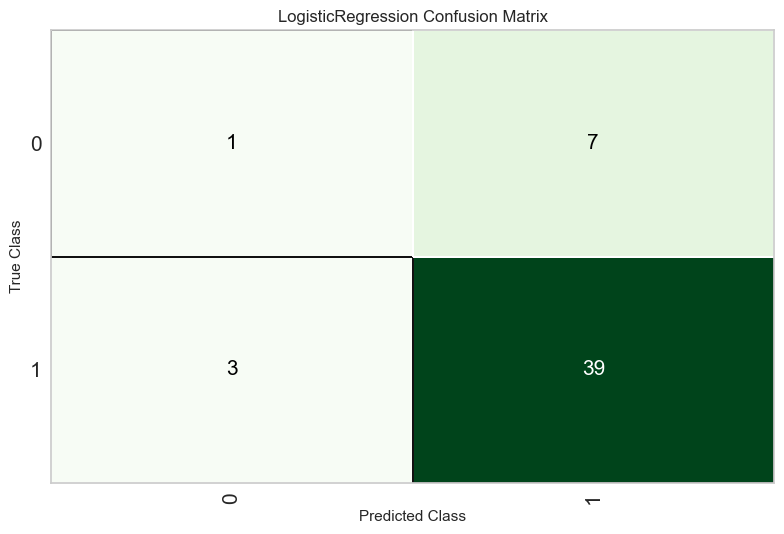

In [14]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

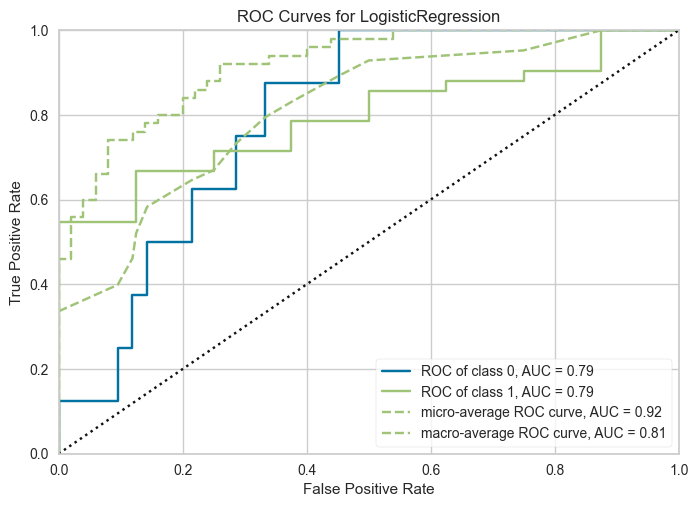

In [15]:
# plot AUC
plot_model(best, plot = 'auc')

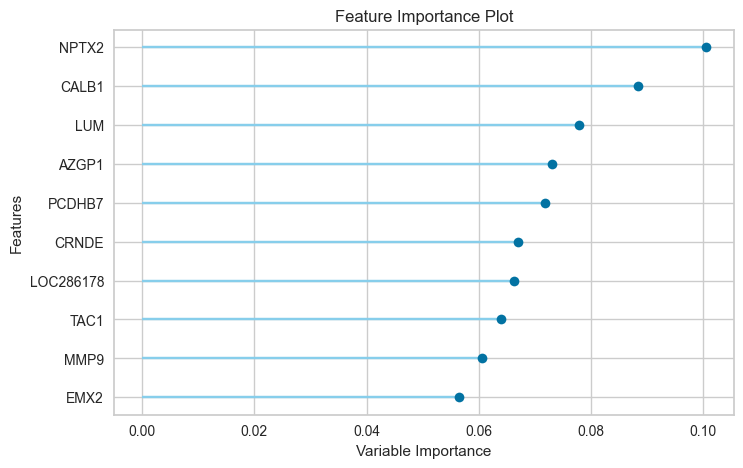

In [16]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [17]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [18]:
# predict on test set
holdout_pred = predict_model(best)

In [19]:
# show predictions df
holdout_pred.head()

,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,AA06,AAAS,...,ZYX,ZZEF1,ZZZ3,SEX,RACE,WHO_GRADING,CANCER_TYPE,SURVIVAL_STATUS,prediction_label,prediction_score
322,6.402787,6.495252,5.341027,11.528931,6.242166,5.459717,6.692125,6.062639,6.256402,8.698477,...,10.023283,8.334317,8.240422,1.0,5.0,2.0,1.0,1,1,0.9999
103,6.901942,6.668352,5.399072,12.779867,5.882757,5.409008,7.056388,6.040975,6.597054,8.690056,...,9.879236,8.223428,8.653494,0.0,5.0,2.0,1.0,1,0,0.6511
190,6.384975,6.561908,5.619585,11.975884,6.484792,5.419208,6.967027,6.280936,6.595826,8.448489,...,9.989137,8.230336,8.335367,0.0,5.0,2.0,1.0,1,0,0.6466
180,6.544692,6.983810,5.366946,11.902424,6.535659,5.352188,7.184108,5.853459,6.257964,8.938189,...,9.137546,8.657193,8.323809,0.0,5.0,0.0,3.0,0,0,0.9584
115,6.934919,6.698151,5.475605,12.526691,5.846751,5.397762,7.092747,6.109719,6.599792,8.497031,...,11.005384,8.203047,8.666437,1.0,5.0,2.0,1.0,1,1,0.9999


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [21]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('SURVIVAL_STATUS', axis=1, inplace=True)
new_data.head()

,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,AA06,AAAS,...,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,SEX,RACE,WHO_GRADING,CANCER_TYPE
36,6.773502,6.789219,5.600558,9.098100,6.173517,5.440019,7.269116,6.331675,6.641092,9.134946,...,7.677177,6.282242,8.895918,9.727756,8.539866,7.788628,0.0,5.0,1.0,3.0
37,6.888966,6.919759,5.382967,12.801268,6.267367,5.526409,7.406114,6.055349,6.228142,8.493976,...,7.258182,6.013034,9.367449,9.538811,8.286802,8.667675,1.0,5.0,2.0,1.0
41,6.162679,6.690407,5.488302,13.112363,6.172498,5.311279,7.286909,6.268861,6.310759,8.605680,...,7.261831,6.189606,8.856313,9.431750,8.242901,7.979640,0.0,5.0,2.0,1.0
43,6.791863,6.872367,5.427558,12.467948,5.984008,5.637168,7.221617,6.041661,6.152246,8.791074,...,7.322752,6.385392,9.354172,9.746052,8.382402,8.677187,0.0,5.0,2.0,1.0
47,7.311807,7.044221,5.411064,13.161513,6.150529,5.508135,7.623547,6.050093,6.328601,8.594638,...,7.275325,5.967357,9.289735,10.121427,8.246705,8.874775,0.0,5.0,0.0,0.0


In [22]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,AA06,AAAS,...,ZYG11B,ZYX,ZZEF1,ZZZ3,SEX,RACE,WHO_GRADING,CANCER_TYPE,prediction_label,prediction_score
36,6.773502,6.789219,5.600558,9.098100,6.173517,5.440019,7.269116,6.331675,6.641092,9.134946,...,8.895919,9.727757,8.539866,7.788628,0.0,5.0,1.0,3.0,1,1.0000
37,6.888966,6.919758,5.382967,12.801269,6.267367,5.526409,7.406114,6.055349,6.228142,8.493977,...,9.367449,9.538811,8.286801,8.667675,1.0,5.0,2.0,1.0,0,0.9922
41,6.162679,6.690407,5.488302,13.112363,6.172498,5.311279,7.286909,6.268861,6.310759,8.605680,...,8.856314,9.431750,8.242901,7.979640,0.0,5.0,2.0,1.0,1,0.9978
43,6.791863,6.872367,5.427558,12.467948,5.984008,5.637168,7.221617,6.041661,6.152246,8.791074,...,9.354173,9.746052,8.382401,8.677187,0.0,5.0,2.0,1.0,1,0.9666
47,7.311807,7.044220,5.411064,13.161512,6.150528,5.508135,7.623548,6.050093,6.328601,8.594639,...,9.289735,10.121427,8.246705,8.874775,0.0,5.0,0.0,0.0,1,0.7422


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
          steps=[('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glu...
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('trained_model',
                  Lo

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glu...
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [23]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.7500,1.0000,0.8333,0.9091,0.0000,0.0000
1,0.8333,0.9000,1.0000,0.8333,0.9091,0.0000,0.0000
2,0.9167,0.8000,1.0000,0.9091,0.9524,0.6250,0.6742
3,0.9167,0.7000,1.0000,0.9091,0.9524,0.6250,0.6742
4,0.8333,0.7500,1.0000,0.8333,0.9091,0.0000,0.0000
5,0.6667,0.2000,0.8000,0.8000,0.8000,-0.2000,-0.2000
6,0.9091,0.7222,1.0000,0.9000,0.9474,0.6207,0.6708
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9091,0.7000,1.0000,0.9091,0.9524,0.0000,0.0000


The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [24]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.7500,1.00,0.8333,0.9091,0.0000,0.0000
1,0.8333,0.9000,1.00,0.8333,0.9091,0.0000,0.0000
2,0.9167,0.8000,1.00,0.9091,0.9524,0.6250,0.6742
3,0.9167,0.7000,1.00,0.9091,0.9524,0.6250,0.6742
4,0.8333,0.7500,1.00,0.8333,0.9091,0.0000,0.0000
5,0.6667,0.2000,0.80,0.8000,0.8000,-0.2000,-0.2000
6,0.9091,0.7222,1.00,0.9000,0.9474,0.6207,0.6708
7,1.0000,1.0000,1.00,1.0000,1.0000,1.0000,1.0000
8,0.9091,0.7000,1.00,0.9091,0.9524,0.0000,0.0000


## ✅ Tune Model

This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [25]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.7500,1.0000,0.9091,0.9524,0.6250,0.6742
1,0.7500,0.6500,0.8000,0.8889,0.8421,0.2500,0.2582
2,0.8333,0.7000,0.9000,0.9000,0.9000,0.4000,0.4000
3,0.6667,0.4000,0.8000,0.8000,0.8000,-0.2000,-0.2000
4,0.8333,0.5000,1.0000,0.8333,0.9091,0.0000,0.0000
5,0.6667,0.4000,0.8000,0.8000,0.8000,-0.2000,-0.2000
6,0.8182,0.5000,1.0000,0.8182,0.9000,0.0000,0.0000
7,0.6364,0.3500,0.7000,0.8750,0.7778,-0.1579,-0.1936
8,0.7273,0.4000,0.8000,0.8889,0.8421,-0.1379,-0.1491


In [26]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.5000,1.0000,0.8333,0.9091,0.0000,0.0000
1,0.8333,0.5000,1.0000,0.8333,0.9091,0.0000,0.0000
2,0.8333,0.5000,1.0000,0.8333,0.9091,0.0000,0.0000
3,0.8333,0.5000,1.0000,0.8333,0.9091,0.0000,0.0000
4,0.8333,0.5000,1.0000,0.8333,0.9091,0.0000,0.0000
5,0.8333,0.5000,1.0000,0.8333,0.9091,0.0000,0.0000
6,0.8182,0.5000,1.0000,0.8182,0.9000,0.0000,0.0000
7,0.9091,0.5000,1.0000,0.9091,0.9524,0.0000,0.0000
8,0.9091,0.5000,1.0000,0.9091,0.9524,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [27]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [28]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.7500,1.0000,0.9091,0.9524,0.6250,0.6742
1,0.8333,0.7000,0.9000,0.9000,0.9000,0.4000,0.4000
2,0.8333,0.7000,0.9000,0.9000,0.9000,0.4000,0.4000
3,0.8333,0.2500,1.0000,0.8333,0.9091,0.0000,0.0000
4,0.8333,0.2500,1.0000,0.8333,0.9091,0.0000,0.0000
5,0.5833,0.3500,0.7000,0.7778,0.7368,-0.2500,-0.2582
6,0.8182,0.5000,1.0000,0.8182,0.9000,0.0000,0.0000
7,0.7273,0.4000,0.8000,0.8889,0.8421,-0.1379,-0.1491
8,0.9091,0.5000,1.0000,0.9091,0.9524,0.0000,0.0000


Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [29]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.5000,1.0000,0.8333,0.9091,0.0000,0.0000
1,0.8333,0.5000,1.0000,0.8333,0.9091,0.0000,0.0000
2,0.8333,0.5000,1.0000,0.8333,0.9091,0.0000,0.0000
3,0.8333,0.5000,1.0000,0.8333,0.9091,0.0000,0.0000
4,0.8333,0.5000,1.0000,0.8333,0.9091,0.0000,0.0000
5,0.8333,0.5000,1.0000,0.8333,0.9091,0.0000,0.0000
6,0.8182,0.5000,1.0000,0.8182,0.9000,0.0000,0.0000
7,0.9091,0.5000,1.0000,0.9091,0.9524,0.0000,0.0000
8,0.9091,0.5000,1.0000,0.9091,0.9524,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [ ]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
                                      steps=[('clean_column_names',
                                              TransformerWrapper(exclude=None,
                                                                 include=None,
                                                                 transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                                             ('numerical_imputer',
                                              Tra...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

## ✅ Ensemble Model

In [30]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.9000,1.0000,0.8333,0.9091,0.0000,0.0000
1,0.8333,0.5750,1.0000,0.8333,0.9091,0.0000,0.0000
2,0.9167,0.6500,1.0000,0.9091,0.9524,0.6250,0.6742
3,0.6667,0.2250,0.8000,0.8000,0.8000,-0.2000,-0.2000
4,0.8333,0.7000,1.0000,0.8333,0.9091,0.0000,0.0000
5,0.5833,0.0750,0.7000,0.7778,0.7368,-0.2500,-0.2582
6,0.7273,0.5833,0.8889,0.8000,0.8421,-0.1379,-0.1491
7,0.8182,0.7000,0.9000,0.9000,0.9000,-0.1000,-0.1000
8,0.8182,0.0500,0.9000,0.9000,0.9000,-0.1000,-0.1000


BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [31]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.7500,1.0000,0.9091,0.9524,0.6250,0.6742
1,0.7500,0.6500,0.8000,0.8889,0.8421,0.2500,0.2582
2,0.8333,0.7000,0.9000,0.9000,0.9000,0.4000,0.4000
3,0.8333,0.7000,0.9000,0.9000,0.9000,0.4000,0.4000
4,0.8333,0.7000,0.9000,0.9000,0.9000,0.4000,0.4000
5,0.5833,0.3500,0.7000,0.7778,0.7368,-0.2500,-0.2582
6,0.7273,0.4444,0.8889,0.8000,0.8421,-0.1379,-0.1491
7,0.7273,0.4000,0.8000,0.8889,0.8421,-0.1379,-0.1491
8,0.9091,0.5000,1.0000,0.9091,0.9524,0.0000,0.0000


AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

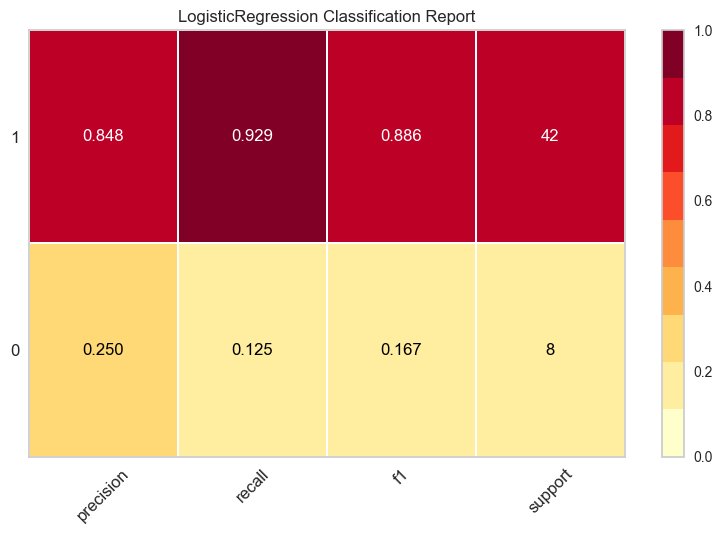

In [32]:
# plot class report
plot_model(best, plot = 'class_report')

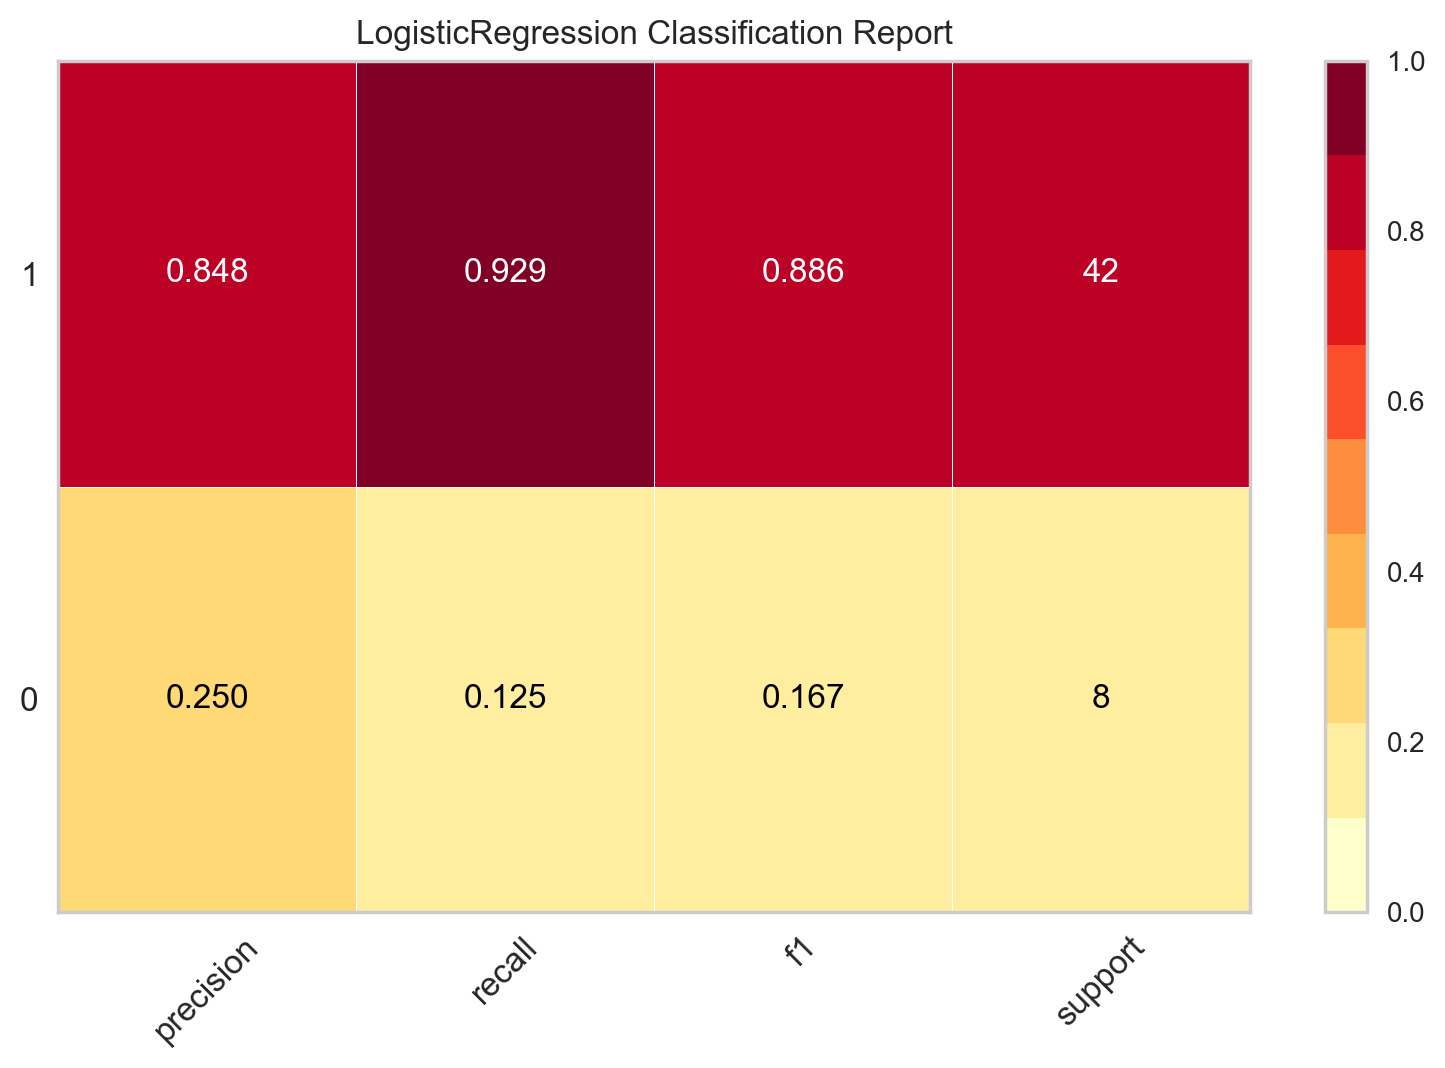

In [33]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [34]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model)

## ✅ Interpret Model

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [35]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.6000,1.0000,0.8333,0.9091,0.0000,0.0000
1,0.8333,0.4000,1.0000,0.8333,0.9091,0.0000,0.0000
2,0.8333,0.9500,1.0000,0.8333,0.9091,0.0000,0.0000
3,0.8333,0.5000,1.0000,0.8333,0.9091,0.0000,0.0000
4,0.8333,0.4500,1.0000,0.8333,0.9091,0.0000,0.0000
5,0.6667,0.3000,0.8000,0.8000,0.8000,-0.2000,-0.2000
6,0.9091,0.6111,1.0000,0.9000,0.9474,0.6207,0.6708
7,0.8182,0.7000,0.9000,0.9000,0.9000,-0.1000,-0.1000
8,0.9091,0.6000,1.0000,0.9091,0.9524,0.0000,0.0000


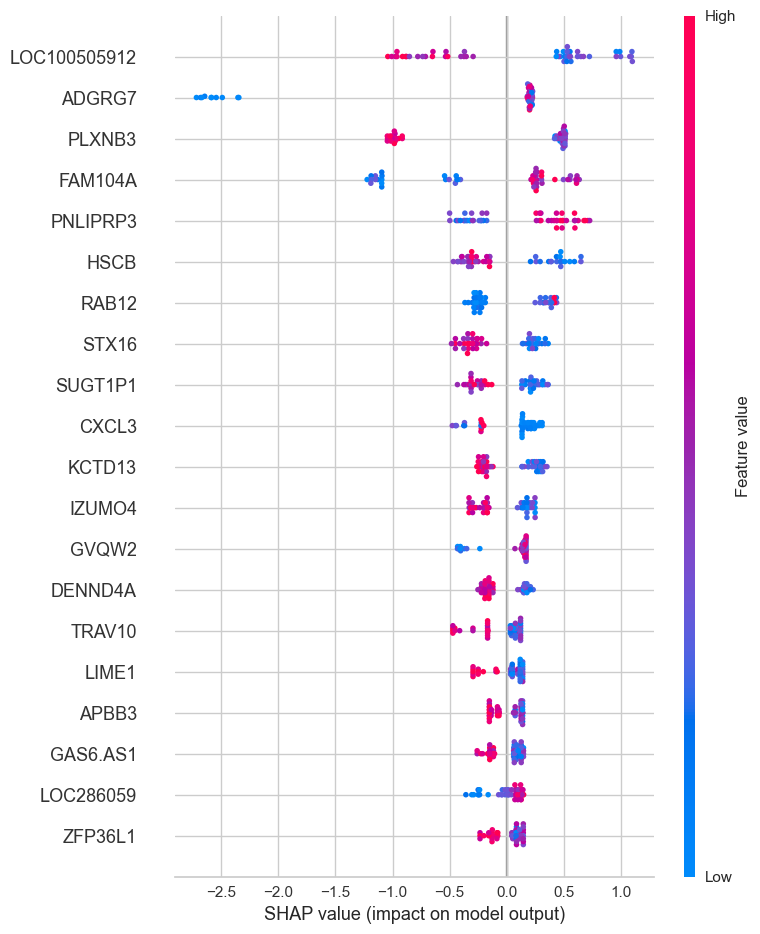

In [36]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [37]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [ ]:
# help(interpret_model)

## ✅ Calibrate Model

This function calibrates the probability of a given model using isotonic or logistic regression. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

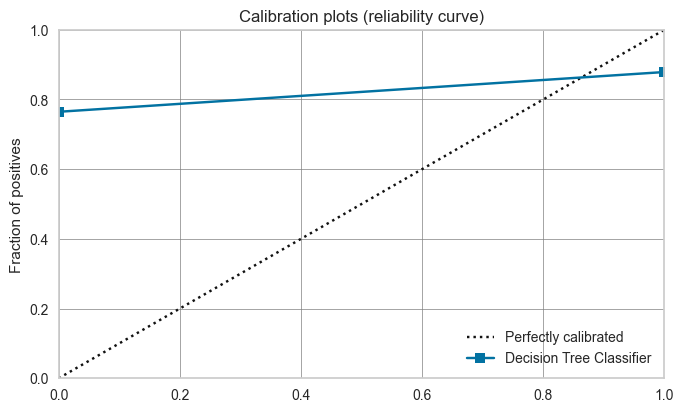

In [38]:
# check calbiration of default dt
plot_model(dt, plot = 'calibration')

In [39]:
# calibrate default dt
calibrated_dt = calibrate_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.3750,1.0000,0.8333,0.9091,0.0000,0.0000
1,0.8333,0.6250,1.0000,0.8333,0.9091,0.0000,0.0000
2,0.8333,0.6500,1.0000,0.8333,0.9091,0.0000,0.0000
3,0.8333,0.6500,1.0000,0.8333,0.9091,0.0000,0.0000
4,0.8333,0.8500,1.0000,0.8333,0.9091,0.0000,0.0000
5,0.8333,0.4500,1.0000,0.8333,0.9091,0.0000,0.0000
6,0.8182,0.1667,1.0000,0.8182,0.9000,0.0000,0.0000
7,0.9091,0.6000,1.0000,0.9091,0.9524,0.0000,0.0000
8,0.9091,0.6500,1.0000,0.9091,0.9524,0.0000,0.0000


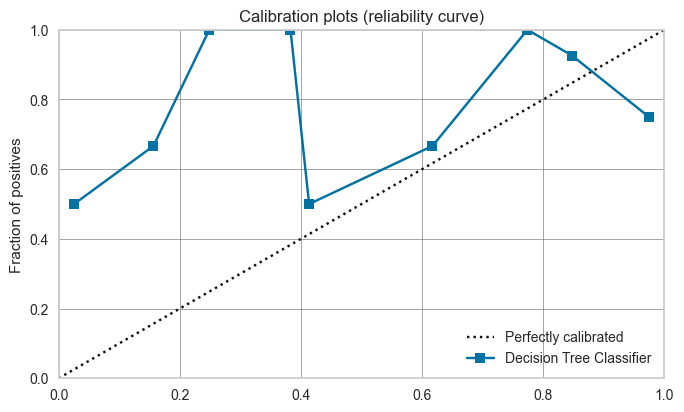

In [40]:
# check calbiration of calibrated dt
plot_model(calibrated_dt, plot = 'calibration')

Some other parameters that you might find very useful in `calibrate_model` are:

- calibrate_fold
- fit_kwargs
- method
- return_train_score
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(calibrate_model)

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [41]:
# get leaderboard
lb = get_leaderboard()
lb

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapper(exclude=None,\n ...",0.8727,0.7522,0.9800,0.8836,0.9284,0.2671,0.2819
1,K Neighbors Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8553,0.5125,0.9900,0.8612,0.9207,0.0496,0.0536
2,Naive Bayes,"(TransformerWrapper(exclude=None,\n ...",0.7932,0.6319,0.8589,0.8979,0.8724,0.2723,0.2882
3,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7667,0.5100,0.8700,0.8613,0.8623,0.0479,0.0490
4,SVM - Linear Kernel,"(TransformerWrapper(exclude=None,\n ...",0.7879,0.0000,0.9000,0.7712,0.8303,0.0000,0.0000
5,Ridge Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8470,0.0000,0.9500,0.8803,0.9127,0.2221,0.2310
6,Random Forest Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8629,0.6639,1.0000,0.8621,0.9255,0.0625,0.0674
7,Quadratic Discriminant Analysis,"(TransformerWrapper(exclude=None,\n ...",0.6932,0.5139,0.7778,0.8459,0.8052,-0.0111,-0.0024
8,Ada Boost Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7947,0.6400,0.9300,0.8445,0.8837,-0.0725,-0.0735


In [ ]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glu...
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ['trained_model',
                 LinearDiscriminantAnalysis(covariance_estimator=None,
                                            n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001)]],
         verbose=False)

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(get_leaderboard)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [42]:
automl()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## ✅ Check Fairness

There are many approaches to conceptualizing fairness. The check_fairness function follows the approach known as group fairness, which asks: which groups of individuals are at risk for experiencing harm. `check_fairness` provides fairness-related metrics between different groups (also called sub-population).

In [43]:
# check fairness
check_fairness(best, sensitive_features = ['SEX'])

ModuleNotFoundError: 
'fairlearn' is a soft dependency and not included in the pycaret installation. Please run: `pip install fairlearn` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

## ✅ Dashboard
The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using `ExplainerDashboard`. For more information check out [Explainer Dashboard.](explainerdashboard.readthedocs.io)

In [44]:
# dashboard function
dashboard(dt, display_format ='inline')

ModuleNotFoundError: 
'explainerdashboard' is a soft dependency and not included in the pycaret installation. Please run: `pip install explainerdashboard` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

## ✅Create App
This function creates a basic gradio app for inference.

In [ ]:
# create gradio app
create_app(best)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## ✅ Create API
This function takes an input model and creates a POST API for inference.

In [ ]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [ ]:
# !python my_first_api.py

In [ ]:
# check out the .py file created with this magic command
# %load my_first_api.py

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [ ]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [ ]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [ ]:
# check out the requirements file created with this magic command
# %load requirements.txt

## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glu...
                                                              verbose='deprecated'))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('actual_estimator',
                 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True,
                                 fit_intercept=True, max_iter=None,
                                 normalize='deprecated', positive=False,
                                 random_state=123, solver='auto', tol=0.001))],
         verbose=False)

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [ ]:
# transpiles learned function to java
print(convert_model(best, language = 'java'))

public class Model {
    public static double score(double[] input) {
        return -2.4222329408494767 + input[0] * 0.5943492729771869 + input[1] * 2.3273354603187455 + input[2] * -0.41637843900032867 + input[3] * 0.10259178891131746 + input[4] * -0.3134524281639536 + input[5] * 1.4903417391961826 + input[6] * 0.5019685413792472 + input[7] * 0.12389520576261319;
    }
}



## ✅ Deploy Model
This function deploys the entire ML pipeline on the cloud.

**AWS:**  When deploying model on AWS S3, environment variables must be configured using the command-line interface. To configure AWS environment variables, type `aws configure` in terminal. The following information is required which can be generated using the Identity and Access Management (IAM) portal of your amazon console account:

- AWS Access Key ID
- AWS Secret Key Access
- Default Region Name (can be seen under Global settings on your AWS console)
- Default output format (must be left blank)

**GCP:** To deploy a model on Google Cloud Platform ('gcp'), the project must be created using the command-line or GCP console. Once the project is created, you must create a service account and download the service account key as a JSON file to set environment variables in your local environment. Learn more about it: https://cloud.google.com/docs/authentication/production

**Azure:** To deploy a model on Microsoft Azure ('azure'), environment variables for the connection string must be set in your local environment. Go to settings of storage account on Azure portal to access the connection string required.
AZURE_STORAGE_CONNECTION_STRING (required as environment variable)
Learn more about it: https://docs.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?toc=%2Fpython%2Fazure%2FTOC.json

In [ ]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [ ]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [ ]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
          steps=[('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glu...
                                                               verbose='deprecated'))),
                 ('normalize',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=MinMaxScaler(clip=False,
                                                              copy=True,
                                                              fe

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glu...
                                                              verbose='deprecated'))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('trained_model',
                 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True,
                                 fit_intercept=True, max_iter=None,
                                 normalize='deprecated', positive=False,
                                 random_state=123, solver='auto', tol=0.001))],
         verbose=False)

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple
